In [1]:
import os
import pandas as pd
import pdb
import time
from sklearn.preprocessing import minmax_scale

def blend(path, select_to_essemble, weights=None, minmaxscale=False, shortenname=False):
    if weights is not None:
        if type(weights) != dict:
            raise ValueError('weights must be a dict or None')
        sum_weight = sum(weights.values())
        if int(sum_weight*10000)+1 != 10000 and int(sum_weight) != 1: # sometimes sum can be 0.9999999999999999, which is 1 essentially
            raise ValueError('sum of weights must be 1, but you have: {}'.format(sum_weight))
        if len(select_to_essemble) != len(weights):
            raise ValueError('when weight is not None, it must have length of select_to_essemble')
    xgb_topn_repo = {}   
    cnt = 0
    for filename in os.listdir(path):
#         pdb.set_trace()
        #score += float(item.split('_')[-1])
        select = None
        if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
            select = filename
        else:
            if filename in select_to_essemble:
                select = filename
            else:
                continue
        print('selected: ' + select)
        tmp = pd.read_csv(path+select)
        if shortenname:
            if select.split('.')[-1] == 'gz':
                shortened_name = select.split('.')[-3].split('_')[-1]
            else:
                shortened_name = select.split('.')[-2].split('_')[-1]
            xgb_topn_repo[shortened_name] = tmp.copy()
        else:
            xgb_topn_repo[select] = tmp.copy()
#         import pdb
#         pdb.set_trace()
        if cnt == 0:
            label_cols = list(tmp.columns)
            label_cols.pop(0) # remove 'id'
            print('please check if the label_cols is right:')
            print(label_cols)
        if minmaxscale:
            tmp[label_cols] = minmax_scale(tmp[label_cols].values)  
        if weights is not None:
            tmp[label_cols] = tmp[label_cols].applymap(lambda x: x*weights[select])
        if cnt == 0:
            preds = tmp
        else:
            preds[label_cols] += tmp[label_cols]  
        cnt += 1

    print(str(cnt)+' results selected')
    if weights is None:
        preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)
    return preds, label_cols, xgb_topn_repo, cnt

path = '/home/kai/data/kaggle/talkingdata/data/SUBS/'#'NewRnnPreds/'

select_to_essemble = []
for filename in os.listdir(path):
    if 'csv' in filename:
        select_to_essemble.append(filename)
        print(filename)

select_to_essemble

preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble)

In [18]:
path = '/home/kai/data/kaggle/talkingdata/data/SUBS/'

select_to_essemble = [
#     'all_suppelement_tree_1200_depth6_scale398_lr0.05_ntree_300_450_600_lb0.9804.csv.gz',
    'all_suppelement_tree_1200_depth6_scale398_lr0.05_ntree_650_850_1100.csv.gz',
    'all_suppelement_xgbtree_900_depth7_scale99_lr0.1_ntree_80_120_150_lb0.9809.csv.gz',
    'paramsCombo_1_lr0.05_scale99_ntree500ntree_300_370_470_lb0.9816.csv.gz',
    'Blend_3_9815_3_5216870_lb9816.csv.gz'
    #'equal_hour_blend_matrixregV5_leaf61_firsttimediff_exclude_lb0.9800.csv.gz',
    #'allday_blend_supplement_V2_attributediff_lb0.9815.csv.gz',
#     'allday_blend_supplement_V2_attributediff_noreg_lb0.9815.csv.gz',
    #'paramsCombo_1_lr0.03ntree_595_605_802_lb0.9815.csv.gz'
#     'equal_hour_blend_equalhour_supplement_V1_0.9811.csv.gz'
    #'sub_it_4513683_9778.csv.gz',
    #'wordbatch_fm_ftrl_4525246_9769.csv.gz'
]

weights = {
#     'all_suppelement_tree_1200_depth6_scale398_lr0.05_ntree_300_450_600_lb0.9804.csv.gz':0.15,
    'all_suppelement_tree_1200_depth6_scale398_lr0.05_ntree_650_850_1100.csv.gz':0.2,
    'all_suppelement_xgbtree_900_depth7_scale99_lr0.1_ntree_80_120_150_lb0.9809.csv.gz':0.2,
    'paramsCombo_1_lr0.05_scale99_ntree500ntree_300_370_470_lb0.9816.csv.gz':0.3,
    'Blend_3_9815_3_5216870_lb9816.csv.gz':0.3,
#     'allday_blend_supplement_V2_attributediff_lb0.9815.csv.gz':0.5,
#     'allday_blend_supplement_V2_attributediff_noreg_lb0.9815.csv.gz':0.25,
#     'paramsCombo_1_lr0.03ntree_595_605_802_lb0.9815.csv.gz':0.5
#     'equal_hour_blend_equalhour_supplement_V1_0.9811.csv.gz':0.4
#     'equal_hour_blend_matrixregV5_leaf61_firsttimediff_exclude_lb0.9800.csv.gz':0.7,
#     'sub_it_4513683_9778.csv.gz':0.3,
    #'wordbatch_fm_ftrl_4525246_9769.csv.gz':0.2
}

preds, label_cols, xgb_topn_repo, cnt = blend(path, select_to_essemble, weights, shortenname=True)

selected: all_suppelement_xgbtree_900_depth7_scale99_lr0.1_ntree_80_120_150_lb0.9809.csv.gz
please check if the label_cols is right:
['is_attributed']
selected: Blend_3_9815_3_5216870_lb9816.csv.gz
selected: paramsCombo_1_lr0.05_scale99_ntree500ntree_300_370_470_lb0.9816.csv.gz
selected: all_suppelement_tree_1200_depth6_scale398_lr0.05_ntree_650_850_1100.csv.gz
4 results selected


In [10]:
preds.head(3)

,click_id,is_attributed
0,0,0.195117
1,1,0.029715
2,2,0.003693


In [14]:
preds.head(3)

,click_id,is_attributed
0,0,0.149774
1,1,0.022523
2,2,0.003670


In [19]:
preds.head(3)

,click_id,is_attributed
0,0,0.129513
1,1,0.019085
2,2,0.002747


In [22]:
list(xgb_topn_repo)

['9809', 'lb9816', '9816', '1100']

In [16]:
import sys
sys.path.append('/home/kai/data/shiyi/Kaggle/toxic/sc/stacking')
from toxic_utils import scatter_per_label
import matplotlib.pyplot as plt
%matplotlib inline

is_attributed
['9809', 'lb9816', '9816', '1100']


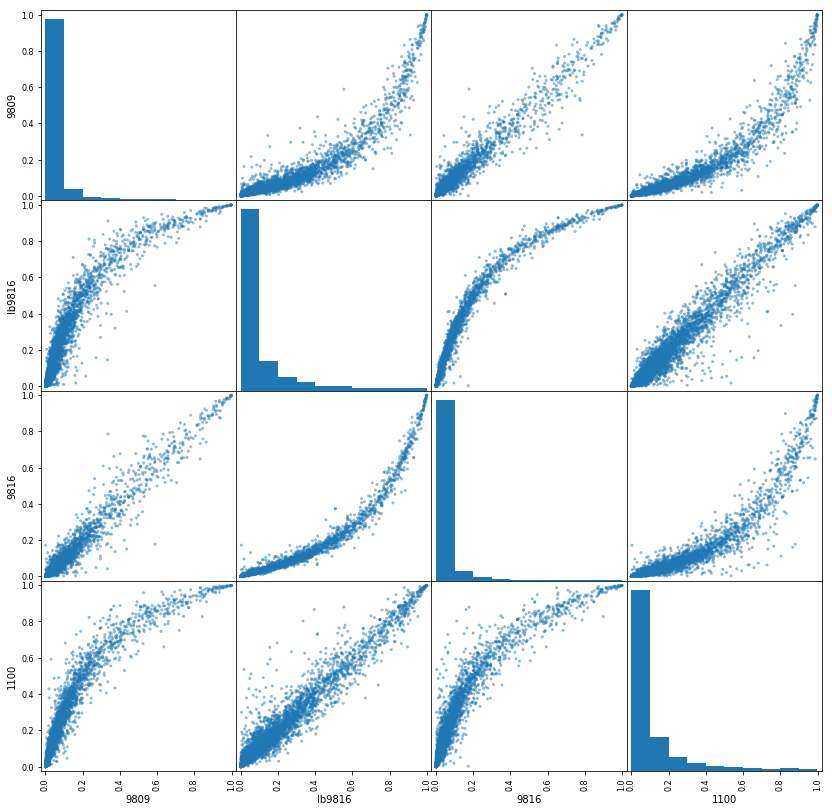

In [21]:
scatter_per_label(xgb_topn_repo, 'is_attributed', 10000)

In [7]:
list(xgb_topn_repo)

['allday_blend_supplement_V2_attributediff_lb0.9815.csv.gz',
 'allday_blend_supplement_V2_attributediff_noreg_lb0.9815.csv.gz',
 'paramsCombo_1_lr0.03ntree_595_605_802_lb0.9815.csv.gz']

In [23]:
tempid = ''
for selected in select_to_essemble:
    temp = selected.split('_')[-1].split('.')[0]
    if len(temp) > 7:
        temp = temp[3:]
    print(temp)
    tempid += temp + '_'
print(tempid)

1100
lb0
lb0
lb9816
1100_lb0_lb0_lb9816_


In [24]:
essemble_name = 'Blend_4' 
tempid = str(int(time.time()))[3:]
print(tempid) 
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, tempid), index=False, float_format='%.9f', compression='gzip')

5271683


In [10]:
preds.tail()

,click_id,is_attributed
18790464,18790464,0.450775
18790465,18790465,0.001221
18790466,18790467,0.059170
18790467,18790466,0.063150
18790468,18790468,0.014700


In [14]:
sub1.tail()

,click_id,is_attributed
18790464,18790464,0.271267
18790465,18790465,0.000226
18790466,18790467,0.013739
18790467,18790466,0.035154
18790468,18790468,0.015491


In [ ]:
matrixFact_user_iposdeviceapp_item_app        6.875544e+08
app_device_os_mean                            2.817552e+08
matrixFact_user_ip_item_appdeviceos           4.225153e+07
ip_app_device_os_time2nextclick               2.945078e+07
app                                           2.927413e+07
channel                                       2.712859e+07
ip_day_hour_count                             2.421059e+07
os                                            1.312061e+07
ip_app_device_os_lasttimediff                 1.166103e+07
ip_device_os_count                            1.035594e+07
matrixFact_user_ipchannel_item_appdeviceos    9.676044e+06
hour                                          7.618717e+06
ip_app_os_day_hour_count                      4.556212e+06
ip_app_device_time2nextclick                  4.482377e+06
ip_app_device_os_count                        4.082734e+06
ip_device_os_lasttimediff                     3.853871e+06
ip_app_device_mean                            3.836370e+06
ip_app_device_countfromfuture                 3.011905e+06
ip_device_os_countfromfuture                  2.949310e+06
ip_app_device_os_countfromfuture              2.911608e+06
ip_app_device_firsttimediff                   2.900243e+06
ip_app_device_countfrompast                   2.835361e+06
device                                        2.679427e+06
attributed_timediff                           2.245644e+06
ip_app_device_lasttimediff                    2.082257e+06
ip_device_os_countfrompast                    1.926570e+06
ip_app_day_hour_count                         1.830265e+06
ip_device_os_time2nextclick                   1.323748e+06
app_day_hour_count                            1.272519e+06
ip_device_os_mean                             1.252566e+06
ip_app_device_os_time2previousclick           1.252520e+06
ip_device_os_firsttimediff                    1.243271e+06
ip_app_device_os_countfrompast                1.125364e+06
ip_os_day_hour_count                          1.080251e+06
ip_app_device_time2previousclick              1.011777e+06
ip_device_os_time2previousclick               8.359501e+05
ip_app_device_os_firsttimediff                6.933558e+05
ip_app_device_os_mean                         5.561160e+05
dtype: float64


channel                                       4982
os                                            2654
app                                           2377
hour                                          1909
ip_app_device_os_time2nextclick               1694
ip_day_hour_count                             1023
app_device_os_mean                             817
ip_device_os_count                             798
matrixFact_user_iposdeviceapp_item_app         777
matrixFact_user_ip_item_appdeviceos            773
ip_app_device_os_lasttimediff                  694
matrixFact_user_ipchannel_item_appdeviceos     653
ip_app_device_time2nextclick                   642
ip_app_device_countfromfuture                  546
ip_app_device_os_count                         537
ip_device_os_countfromfuture                   501
ip_device_os_lasttimediff                      496
app_day_hour_count                             490
ip_app_device_os_time2previousclick            485
ip_app_device_mean                             475
ip_app_device_firsttimediff                    468
ip_app_device_time2previousclick               464
ip_app_device_lasttimediff                     462
ip_app_device_os_countfromfuture               452
ip_device_os_firsttimediff                     438
ip_os_day_hour_count                           436
ip_app_device_countfrompast                    433
ip_app_os_day_hour_count                       433
ip_device_os_mean                              406
ip_device_os_countfrompast                     402
ip_device_os_time2nextclick                    381
ip_app_device_os_firsttimediff                 334
ip_app_day_hour_count                          326
ip_device_os_time2previousclick                313
ip_app_device_os_countfrompast                 298
attributed_timediff                            291
device                                         184
ip_app_device_os_mean                          156

In [26]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

In [27]:
df

,col1,col2
0,1,3
1,2,4


In [42]:
df1 = df[0:]#.copy()

In [45]:
df1

,col1,col2
0,1,3
1,2,4


In [44]:
del df; import gc; gc.collect()

112

In [46]:
df1['new'] = df1['col1'].apply(str)

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
